### Data Source
https://www.kaggle.com/datasets/ylchang/coffee-shop-sample-data-1113<br>
Version 11.1.3+
***

### Data Summary

The data analysed contains almost 50,000 sales transactions from a small chain of three fictional coffee shops, over a one month period in April 2019. The chain sells 80 different products. They're based in New York. The data also has information for just over 2200 of the chains customers.

This representative retail data was originally created for IBM. It consists of 9 spreadsheets, while I have specifically accessed 3, the sales receipts, customer information, and generations outline.
Within the data, each coffee shop has a separate ID of 3, 5 and 8.
***


Aims and Areas Explored

As my first exploratory data analysis project, I have set out to give a solid general overview of this small coffee shop chain.

Initially I have identified some key performance indicators (KPI’s).

I have then looked to identify some key aspects of their customers, their shops performance, and outline the popularity of their products.

As the coffee shops are based in New York, USA, all financials are given in dollars $.
***


## <ins>KPI's

A. Total Revenue\
B. Sales per Shop\
C. Average Order Value\
D. Total Items Sold

## <ins>Customer Profile
Q1 Customer profile by Age, Gender & Generation

## <ins>Sales
Q2 Customer Spend\
Q3 Cash sales by shop\
Q4 Shop Performance

## <ins>Product Sales
Q5 Revenue Generation

***

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings

In [78]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [79]:
palette_color = sns.color_palette('Blues_d')

# Load Data
***

In [80]:
file = "data/201904 sales reciepts.csv"
df_sales = pd.read_csv(file)
len(df_sales)

49894

In [81]:
file = "data/customer.csv"
df_customers = pd.read_csv(file)
len(df_customers)

2246

In [82]:
# This csv data gives dates for the various generations
df_generations = pd.read_csv("data/generations.csv")

# Cleaning
***

### DF Sales

In [83]:
# the 'transaction_id' column and values don't necessarily appear to be linked to individual transactions.
# In the example below, transaction id 3 appears to be spread across numerous days and all three outlets

df_sales[df_sales['transaction_id'] == 3 ].head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
3916,3,03/04/2019,16:43:22,5,30,5809,Y,1,1,54,1,2.5,2.5,N
6044,3,04/04/2019,18:48:10,8,42,8031,N,1,1,22,1,2.0,2.0,N
6571,3,05/04/2019,17:16:50,3,17,280,N,1,1,49,2,6.0,3.0,N
8205,3,06/04/2019,18:31:14,3,12,610,Y,1,1,47,2,6.0,3.0,N
9670,3,07/04/2019,17:11:59,3,16,246,Y,1,1,55,2,8.0,4.0,N


In [84]:
# Combine and convert transaction_date and transaction_time to datetime
df_sales['datetime'] = pd.to_datetime(df_sales['transaction_date'], format='%d/%m/%Y') + pd.to_timedelta(df_sales['transaction_time'])

In [85]:
df_sales['instore_yn'] = df_sales['instore_yn'].replace({'': np.nan, ' ': np.nan})
df_sales['instore_yn'] = df_sales['instore_yn'].replace({'N': 0, 'Y': 1})

In [86]:
index_list = df_sales.columns.to_list()
index_list

drop_cols = ['staff_id', 'order', 'line_item_id', 'promo_item_yn']
df_sales.drop(drop_cols, axis=1, inplace=True)


In [87]:
isna = df_sales.isna().sum()
eq = df_sales.eq('').sum()
null = df_sales.isnull().sum()
print(isna, eq, null)

transaction_id        0
transaction_date      0
transaction_time      0
sales_outlet_id       0
customer_id           0
instore_yn          294
product_id            0
quantity              0
line_item_amount      0
unit_price            0
datetime              0
dtype: int64 transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
customer_id         0
instore_yn          0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
datetime            0
dtype: int64 transaction_id        0
transaction_date      0
transaction_time      0
sales_outlet_id       0
customer_id           0
instore_yn          294
product_id            0
quantity              0
line_item_amount      0
unit_price            0
datetime              0
dtype: int64


### DF Customers

In [88]:
df_customers.sample()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
1280,5481,5,Peter,Marshall@nostra.edu,2018-08-18,908-601-8617,1995-05-01,N,1995


In [89]:
index_list = df_customers.columns.to_list()
cols = ['home_store', 'customer_first-name', 'customer_email', 'customer_since', 'loyalty_card_number']
df_customers.drop(cols, axis=1, inplace=True)

In [90]:
isna = df_customers.isna().sum()
eq = df_customers.eq('').sum()
null = df_customers.isnull().sum()
print(isna, eq, null)

customer_id    0
birthdate      0
gender         0
birth_year     0
dtype: int64 customer_id    0
birthdate      0
gender         0
birth_year     0
dtype: int64 customer_id    0
birthdate      0
gender         0
birth_year     0
dtype: int64


In [91]:
# Replace 'N' as np.nan
df_customers.replace({'gender': 'N'}, np.nan, inplace=True)

In [92]:
print(df_customers.birth_year.describe())

count    2246.000000
mean     1978.385574
std        14.925503
min      1950.000000
25%      1965.000000
50%      1981.000000
75%      1991.000000
max      2001.000000
Name: birth_year, dtype: float64


# <ins>KPI's

Total Sales Revenue across all three shops:

In [93]:
total_revenue = round(df_sales['line_item_amount'].sum(), 2)
print("Total Revenue $:", total_revenue)

Total Revenue $: 233635.95


Total $ Sales per shop:

In [94]:
df_shops = df_sales.copy()
df_shops = df_shops.groupby('sales_outlet_id')['line_item_amount'].sum().to_frame()
df_shops.reset_index(inplace=True)
df_shops.rename(columns={'sales_outlet_id':'shop_id', 'line_item_amount':'total'}, inplace=True)
df_shops

,shop_id,total
0,3,77213.23
1,5,76894.47
2,8,79528.25


Text(0.5, 1.0, 'Sales Revenue by Shop')

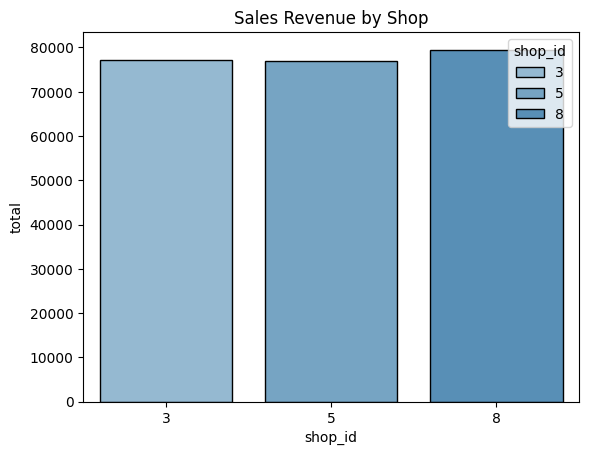

In [95]:
sns.barplot(data=df_shops, x=df_shops.shop_id, y=df_shops.total, hue='shop_id', palette=palette_color, edgecolor='black')
plt.title("Sales Revenue by Shop")

Average / Typical Order Value:

In [96]:
# I note that I'm using the 'transaction_date' column, and I'm simply counting rows as separate transactions
# Please see note in 'Cleaning' section

transactions = df_sales['transaction_date'].count()
Average_order_value = round(total_revenue / transactions, 2)
print("Average Order Value $:", Average_order_value)

Average Order Value $: 4.68


Total items sold over the one month period:

In [97]:
# Total items sold

total_items = df_sales['quantity'].sum()
print("Total Items Sold:", total_items)

Total Items Sold: 71758


# <ins>Customer Profile

Calculate Generation for each customer:

In [98]:
gen_dict = df_generations.to_dict()

In [99]:
def birth_year(dict, year):
    for i, birth_year in enumerate(dict['birth_year']):
        if dict['birth_year'][i] == year:
            gen = dict['generation'][i]
            return gen    

In [100]:
def generation(df, dict):
    customer_gen = []
    for i in range(len(df)):
        year = df.loc[i, 'birth_year']
        gen = birth_year(dict, year)
        customer_gen.append(gen)

    df['generation'] = customer_gen
    return df

In [101]:
df_customers = generation(df_customers, gen_dict)

Calculate Age for each customer:

In [102]:
def age_calc(df, start_year):
    age = []
    for i in range(len(df)):
        byear = df.loc[i, 'birth_year']
        years = start_year - byear
        age.append(years)
    
    df['age'] = age
    return df

In [103]:
df_customers = age_calc(df_customers, start_year=2024)

# Q1 Customer profile by Age, Gender & Generation

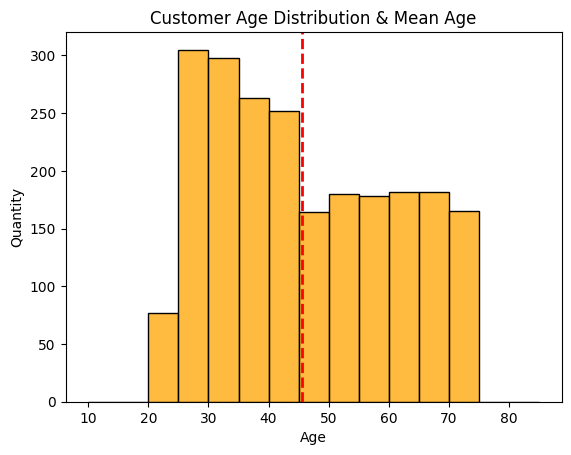

In [104]:
bins = np.arange(10, 90, 5)
data = df_customers['age']
mean_age = data.mean()

sns.histplot(data=data, bins=bins, color='orange')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.title('Customer Age Distribution & Mean Age')
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.show()

In [105]:
data_pie = df_customers[['generation']].value_counts().to_frame()
data_pie.reset_index(inplace=True)
data_pie.rename(columns={"count": "qty_of_customers"}, inplace=True)
data_pie

,generation,qty_of_customers
0,Baby Boomers,529
1,Gen X,522
2,Older Millennials,515
3,Gen Z,382
4,Younger Millennials,298


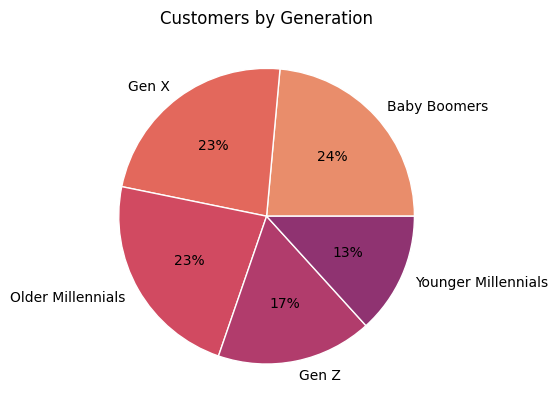

In [106]:
labels = data_pie.generation
colors = sns.color_palette(palette='flare')
plt.pie(data_pie.qty_of_customers, colors=colors, autopct='%.0f%%', labels=labels, wedgeprops={'edgecolor': 'white'})
plt.title("Customers by Generation")
plt.show()


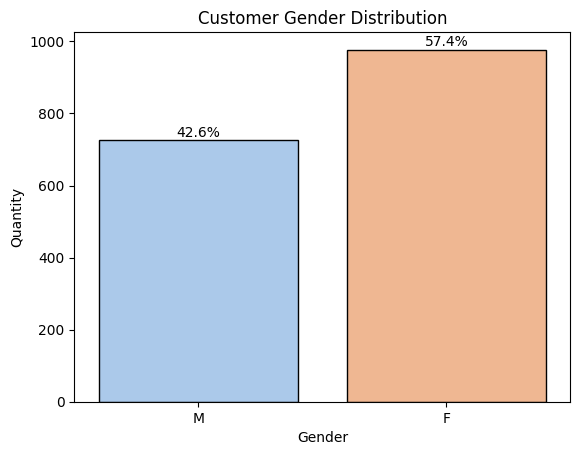

In [107]:
df_customers_cleaned = df_customers.dropna(subset=['gender'])

palette_color = 'pastel'
ax = sns.countplot(data=df_customers_cleaned, x='gender', hue='gender', palette=palette_color, edgecolor='black')

total_count = len(df_customers_cleaned)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10,
            '{:.1f}%'.format((height / total_count) * 100),
            ha="center")

plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.show()

In [108]:
df_gender = df_customers['gender'].value_counts().to_frame()
gender_ratio = round(df_gender.iloc[0,0] / df_gender.iloc[1,0], 2)
print("Gender Ratio - Female to Male:", gender_ratio)

Gender Ratio - Female to Male: 1.35


To summarise the pie chart, we see that 70% of registered customers are Baby Boomers, Gen X, or Older Millennials. Those 70% would have been born between 1946 and 1989, with ages ranging from 78 - 35.
The remaining 30% is composed of Younger Millennials and Gen Z generations. This group would have been born from 1990 onwards, with ages of 34 or less. Younger Millennials and Gen Z are proportionally represented less than other generations, though that may simply be a reflection of typical demographic age spread.

Summary statistics show the typical customers birth year is 1978 - with a mean age of 45.6 years, and indeed the Customer Age Distribution histogram generally confirms this, and gives a more complete description of the spread of customer ages.

The customer gender split is shown above, with women accounting for 57.4% of customers. However, it is worth noting that only 76% of registered customers data gave their gender - (1703 customers).

# <ins> Sales
# Q2 Customer Spend

In [109]:
def get_generation(df, id):
    df = df.set_index('customer_id')
    gen = df.loc[id, 'generation']
    gender = df.loc[id, 'gender']
    age = df.loc[id, 'age']
    return gen, gender, age

In [110]:
def define_gen(df, df_customers):
    gen_list = []
    gender_list = []
    age_list = []
    list_cid = df_customers.customer_id.tolist()

    for i in range(len(df)):
        customer_id = df.loc[i, 'customer_id']
        if customer_id in list_cid:
            gen, gender, age = get_generation(df_customers, customer_id)
        else:
            gen = np.nan
            gender = np.nan
            age = np.nan
        gen_list.append(gen)
        gender_list.append(gender)
        age_list.append(age)
        
    df['generation'] = gen_list
    df['gender'] = gender_list
    df['age'] = age_list

    return df

In [111]:
df_sales = define_gen(df_sales, df_customers)

In [112]:
def generational_sales(df):
    gen_list = df.generation.to_list()
    gen_list = list(set(gen_list))
    #gen_list = gen_list[1:]

    df.set_index('generation')
    sales_dict = {}

    for g in gen_list:
        transaction = 0
        qty_count = 0
        line_total = 0
        for i in range(len(df)):
            if df.loc[i, 'generation'] == g:
                transaction += 1
                qty_count += df.loc[i, 'quantity']
                line_total += df.loc[i, 'line_item_amount']
            sales_dict[g] = [transaction, qty_count, line_total]

    return sales_dict

In [113]:
sales_gen_dict = generational_sales(df_sales)
df_sales_gen = pd.DataFrame(sales_gen_dict, index=['transaction_count', 'qty_items_bought', 'cash_total'])

df_sales_gen = df_sales_gen.transpose(copy=True)
df_sales_gen.reset_index(inplace=True)

In [114]:
def transaction_value(df):
    mean = []
    for i in range(len(df)):
        cash = df.loc[i, 'cash_total']
        qty = df.loc[i, 'transaction_count']
        if qty != 0:
            mean.append(round(cash/qty, 2))
        else:
            mean.append(0)
    df['transaction_mean'] = mean
    return df


In [115]:
df_sales_gen = transaction_value(df_sales_gen)

In [116]:
df_sales_gen.sort_values(by='cash_total', ascending=False, inplace=True)
df_sales_gen['cum_total'] = df_sales_gen['cash_total'].cumsum()
df_sales_gen['percent'] = round((df_sales_gen['cash_total'] / df_sales_gen.iloc[4,5]) * 100 ,1)
df_sales_gen.rename(columns={'index':'generation'}, inplace=True)

# Generational Spend

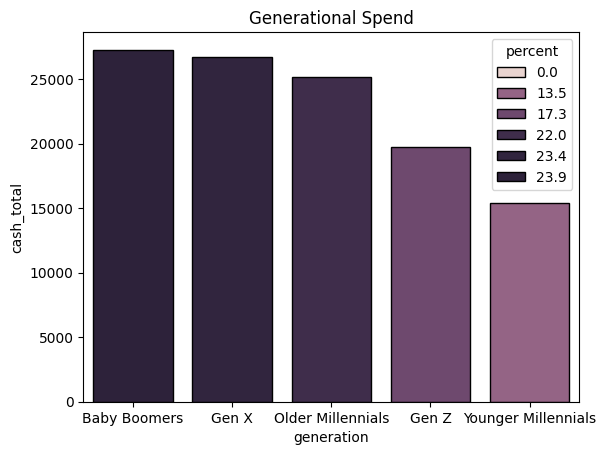

In [117]:
sns.barplot(data=df_sales_gen, x=df_sales_gen.generation, y='cash_total', hue='percent', edgecolor='black')
plt.title("Generational Spend")
plt.show()

The data shows that not only are the older generations the largest cohort, they also account for the greatest cash spend. However, a different picture presents itself when looking at age groups rather than generations.

# Split sales by Gender

Spend by gender is almost exactly proportional to the gender distribution - therefore neither male or females spend more or less than the other on an individual transaction basis.

In [118]:
df_temp = df_customers.groupby('gender')['gender'].count().to_frame()
df_temp = df_temp.rename({'gender': 'Gender_Count'}, axis='columns')

df_gender_split = df_sales.groupby('gender')['line_item_amount'].count().to_frame()
df_gender_split = df_gender_split.rename({'line_item_amount': 'Total_Cash_Sales'}, axis='columns')

df_gender_split = df_gender_split.merge(df_temp, how='left', on='gender')

df_gender_split['ratio'] = df_gender_split['Total_Cash_Sales'] / df_gender_split['Gender_Count']
df_gender_split

,Total_Cash_Sales,Gender_Count,ratio
gender,,,
F,10851,977,11.106448
M,8222,726,11.325069


# Sales by Age Group

In [119]:
product_ids = list(set(df_sales['product_id'].to_list()))
len(product_ids)

80

In [120]:
df_sales_age = df_sales.groupby('age')['line_item_amount'].sum().to_frame().reset_index()

In [121]:
# Not all transactions belong to a registered customer, many are anonymous,
# hence cash total is less than entire sales revenue for all 3 shops.
round(df_sales_age['line_item_amount'].sum(), 2)

114280.23

In [122]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

labels = []
for i in range(len(bins)-1):
    lab_temp = f'{bins[i]}-{bins[i+1]-1}'
    labels.append(lab_temp)
    
df_sales_age['age_group'] = pd.cut(df_sales_age['age'], bins=bins, labels=labels, right=False)
aggregated_data = df_sales_age.groupby('age_group')['line_item_amount'].sum().reset_index()
aggregated_data

,age_group,line_item_amount
0,20-24,3800.21
1,25-29,15917.34
2,30-34,15412.08
3,35-39,12906.75
4,40-44,12250.25
5,45-49,8080.40
6,50-54,8891.85
7,55-59,9751.36
8,60-64,9599.43
9,65-69,8742.67


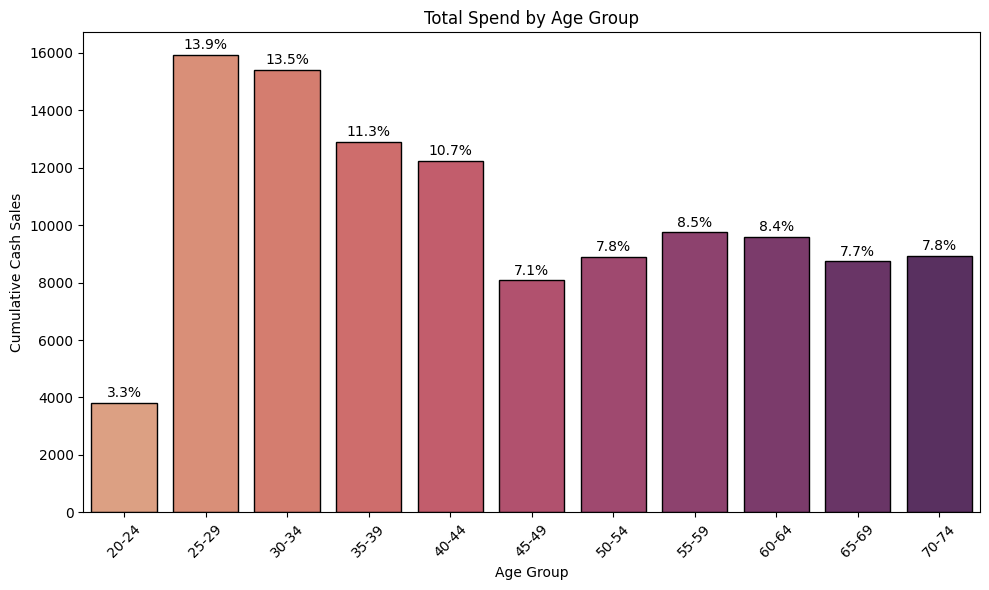

In [123]:
# Plotting the aggregated data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=aggregated_data, x='age_group', y='line_item_amount', palette='flare', edgecolor='black')

# Adding percentage labels
total_sales = df_sales_age['line_item_amount'].sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 200,
            '{:.1f}%'.format((height / total_sales) * 100),
            ha="center")

plt.xlabel('Age Group')
plt.ylabel('Cumulative Cash Sales')
plt.title('Total Spend by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The data shows that sales are more prolific in the age groups ranging from 25 - 45, where their total sales account for 49.4% of shop revenue. This data is similarly reflected in the previous ‘Customer Age Distribution’ chart.
However I note the sales shown here account for slightly less than 50% of all store sales, as not all transactions given belonged to a registered customer.


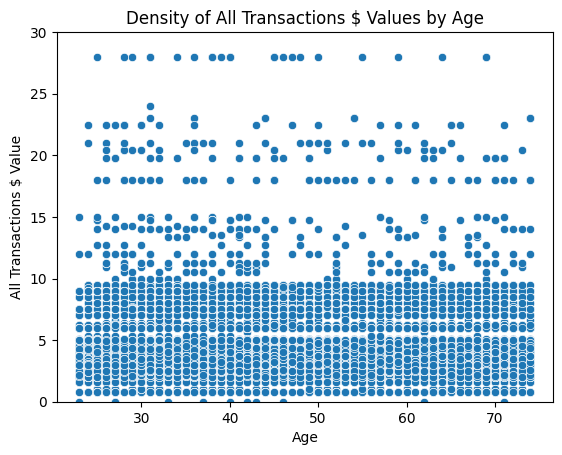

In [124]:
p = sns.color_palette(palette='crest')
sns.scatterplot(df_sales, x='age', y='line_item_amount')#, color=p)#, hue='age')
plt.ylim(0,30)
plt.title('Density of All Transactions $ Values by Age')
plt.xlabel('Age')
plt.ylabel('All Transactions $ Value')
plt.show()

In [125]:
df_sales_age_qty = df_sales['age'].value_counts().to_frame().sort_index()
count = df_sales_age_qty['count'].to_list()
df_sales_age['count'] = count
df_sales_age['avg_spend'] = df_sales_age['line_item_amount'] / df_sales_age['count']

In [126]:
aggregated_data = df_sales_age.groupby('age_group')['avg_spend'].sum().reset_index()
aggregated_data

,age_group,avg_spend
0,20-24,9.051051
1,25-29,23.046014
2,30-34,22.814135
3,35-39,23.021499
4,40-44,22.907546
5,45-49,23.302091
6,50-54,23.094191
7,55-59,23.883032
8,60-64,23.084012
9,65-69,22.540776


Text(0, 0.5, 'Average Transaction $ Value')

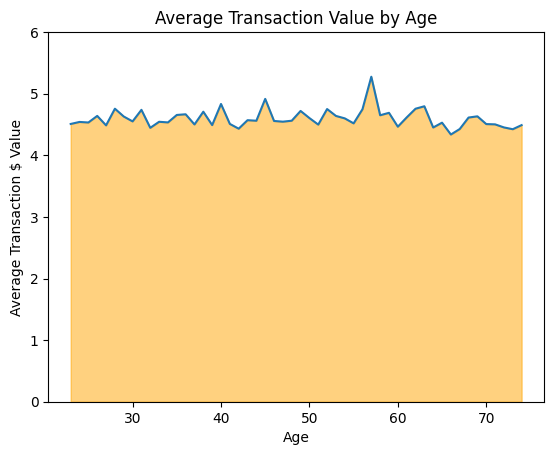

In [127]:
sns.lineplot(df_sales_age, x='age', y='avg_spend')
plt.fill_between(df_sales_age['age'], df_sales_age['avg_spend'], color='orange', alpha=0.5)
plt.ylim(0,6)
plt.title('Average Transaction Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction $ Value')

Throughout the data I have looked to find correlations between many numerical variables. In particular I did wonder if we might see a relationship between the various age groups and their typical spend. However both the scatterplot and line plot above reveal that typical spending amounts across all ages are quite consistent. Average Transaction values are circa $4.60 across all age groups.

# Q3 Cash sales by shop

In [128]:
df_shops = df_sales.copy()
df_shops = df_shops.groupby('sales_outlet_id')['line_item_amount'].sum().to_frame()
df_shops.reset_index(inplace=True)
df_shops.rename(columns={'sales_outlet_id':'shop', 'line_item_amount':'total'}, inplace=True)
df_shops

,shop,total
0,3,77213.23
1,5,76894.47
2,8,79528.25


Text(0.5, 1.0, 'Sales Revenue by Shop')

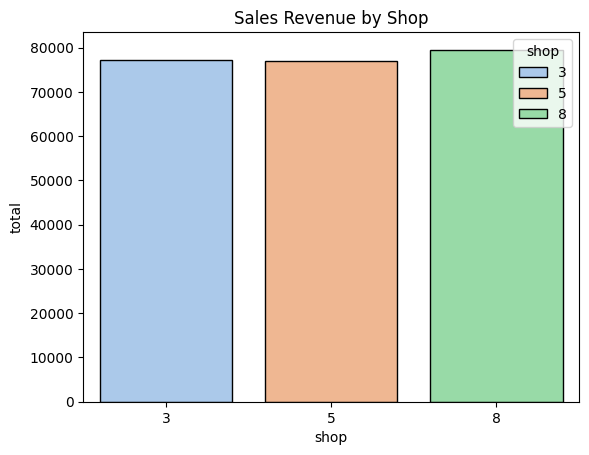

In [129]:
sns.barplot(data=df_shops, x=df_shops.shop, y=df_shops.total, hue='shop', palette=palette_color, edgecolor='black')
plt.title("Sales Revenue by Shop")

# Q4 Shop Performance

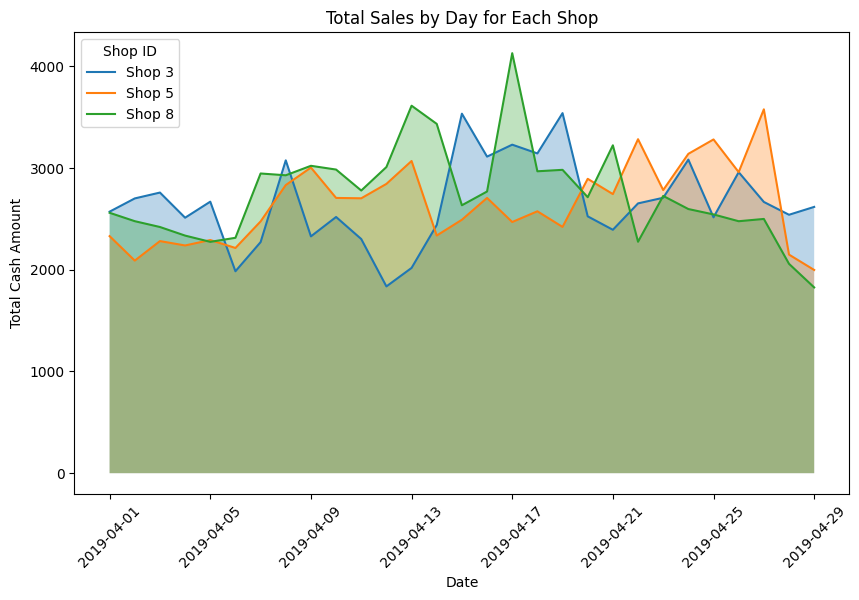

In [130]:
shop_ids = [3, 5, 8]

# Create separate line plots for each shop
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for shop_id in shop_ids:
    # Filter data for the current shop_id
    shop_data_filtered = df_sales[df_sales['sales_outlet_id'] == shop_id]
    # Group by day and calculate cumulative sum of transactions
    df_cumulative = shop_data_filtered.groupby(shop_data_filtered['datetime'].dt.date)['line_item_amount'].sum().reset_index()
    # Plot the data for the current shop
    sns.lineplot(data=df_cumulative, x='datetime', y='line_item_amount', label=f'Shop {shop_id}', errorbar='sd')

    plt.fill_between(df_cumulative['datetime'], df_cumulative['line_item_amount'], alpha=0.3)

# Customize the plot
plt.title('Total Sales by Day for Each Shop')
plt.xlabel('Date')
plt.ylabel('Total Cash Amount')
plt.legend(title='Shop ID')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The chart shows the cash sales for each day and each shop over the dataset period of one month. Shop 5 shows a slight increasing trend of sales over this time, while Shop 3 and Shop 8 show relatively distinct peaks during the middle of the month. It would be interesting to look closer at the reason behind this.

In [131]:
df_sales['transaction_time'] = pd.to_datetime(df_sales['transaction_time'], format='%H:%M:%S')
#

In [132]:
df_shop3 = df_sales[df_sales['sales_outlet_id'] == 3 ]
df_shop5 = df_sales[df_sales['sales_outlet_id'] == 5 ]
df_shop8 = df_sales[df_sales['sales_outlet_id'] == 8 ]

## Histogram of transactions by time of day

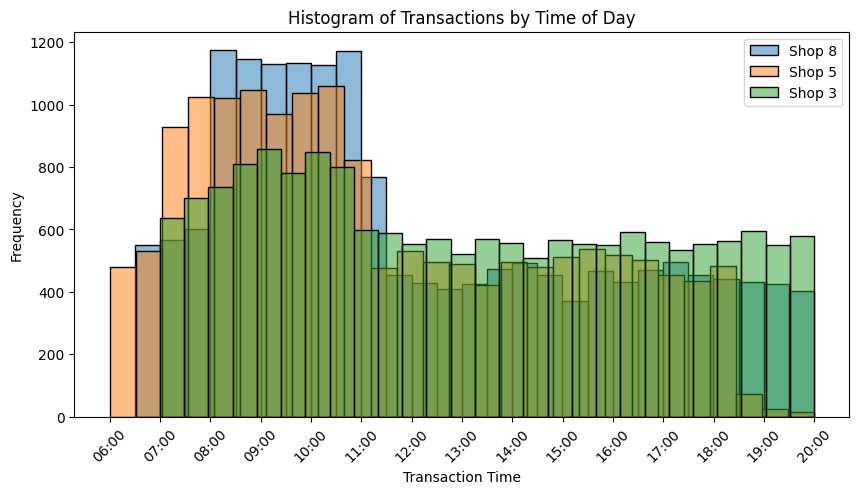

In [146]:
from matplotlib.dates import HourLocator, DateFormatter

shops = [df_shop8, df_shop5, df_shop3]
shop_names = ['Shop 8', 'Shop 5', 'Shop 3']

plt.figure(figsize=(10, 5))

for shop, shop_name in zip(shops, shop_names):
    data = shop[(shop['transaction_time'] >= pd.to_datetime('1900-01-01 06:00:00')) &
                (shop['transaction_time'] <= pd.to_datetime('1900-01-01 20:00:00'))]

    sns.histplot(data=data, x='transaction_time', bins=27, label=shop_name, alpha=0.5)

locator = HourLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.title("Histogram of Transactions by Time of Day")
plt.xlabel("Transaction Time")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.show()


This histogram shows the relative activity in terms of trading hours for each shop. Evidently Shop 8 has a significant peak period in the morning from 8am till approximately 11am. Shop 5, and to a lesser extent Shop 3, show similar but less distinct patterns.  We might conclude that in all cases the morning tends to be the busiest sales period.

# <ins>Product Sales

# Q5 Revenue Generation

The chart below shows production sales distribution in $1.50 increments. Sales are clearly dominated by items in the range of $1.50 - $4.50. That range covers sales of almost 45,000 items. However there are items, for example bags of coffee beans, which do sell for up to $45 - though on the scale above barely register.

Text(0.5, 1.0, 'Product Sales Distribution by Price')

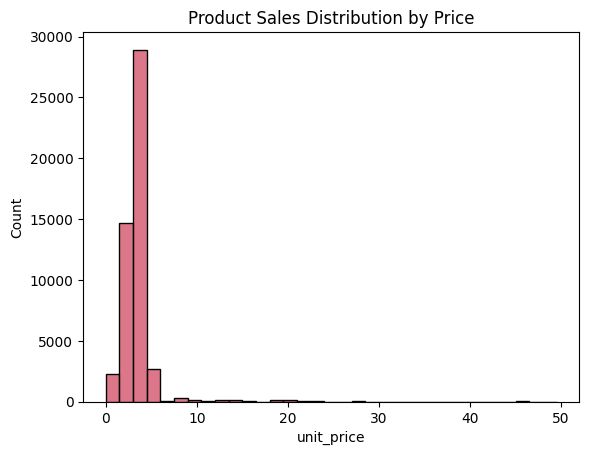

In [134]:
bins = np.arange(0, 50, 1.50)
data = df_sales['unit_price']
colors = sns.color_palette(palette='flare')

sns.histplot(data, bins=bins, color=colors[2])
plt.title("Product Sales Distribution by Price")

In [135]:
def count_sales_qty(df):
    df_temp = df.groupby('product_id')
    qty = df_temp['quantity'].sum().to_frame()
    return qty

In [136]:
def count_revenue(df):
    df_temp = df.groupby('product_id')
    revenue = df_temp['line_item_amount'].sum().to_frame()
    return revenue

In [137]:
df_products_t5 = count_revenue(df_sales)
df_products_t5 = df_products_t5.sort_values(by='line_item_amount', ascending=False).iloc[:5].reset_index()

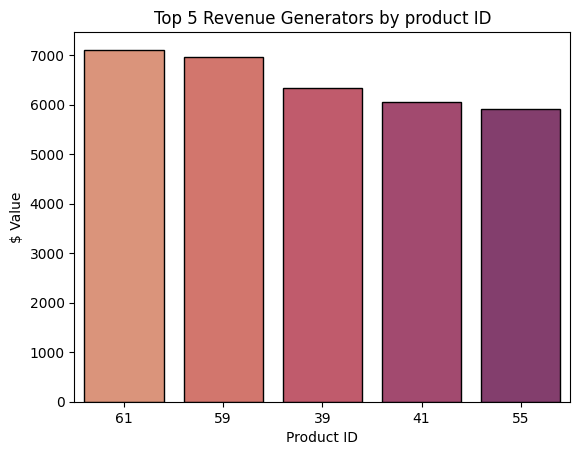

In [138]:
palette = sns.color_palette('flare')
sns.barplot(data=df_products_t5, x='product_id', y='line_item_amount', palette=palette, order=df_products_t5.product_id, edgecolor='black')
plt.title("Top 5 Revenue Generators by product ID")
plt.xlabel("Product ID")
plt.ylabel("$ Value")    
plt.show()

In [139]:
df_products_b5 = count_revenue(df_sales)
df_products_b5 = df_products_b5.sort_values(by='line_item_amount', ascending=True).iloc[:5].reset_index()

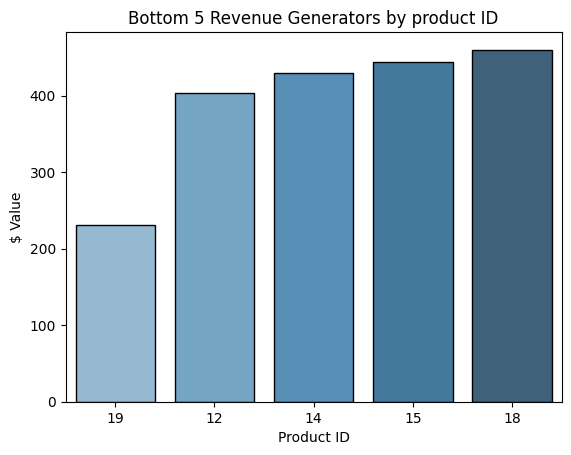

In [140]:
palette = sns.color_palette('Blues_d')
sns.barplot(data=df_products_b5, x='product_id', y='line_item_amount', palette=palette, order=df_products_b5.product_id, edgecolor='black')
plt.title("Bottom 5 Revenue Generators by product ID")
plt.xlabel("Product ID")
plt.ylabel("$ Value")
plt.show()

The two charts above identify the Top 5 and Bottom 5 revenue generating products.
Over the given data period, the top item generated over $7,000 in sales, whilst the bottom item only managed around $235

## Quantity and Revenue of all product lines sold

In [141]:
df_all_products = count_sales_qty(df_sales)
df_all_products = df_all_products.sort_values(by='quantity', ascending=True).reset_index()
product_revenue = count_revenue(df_sales)

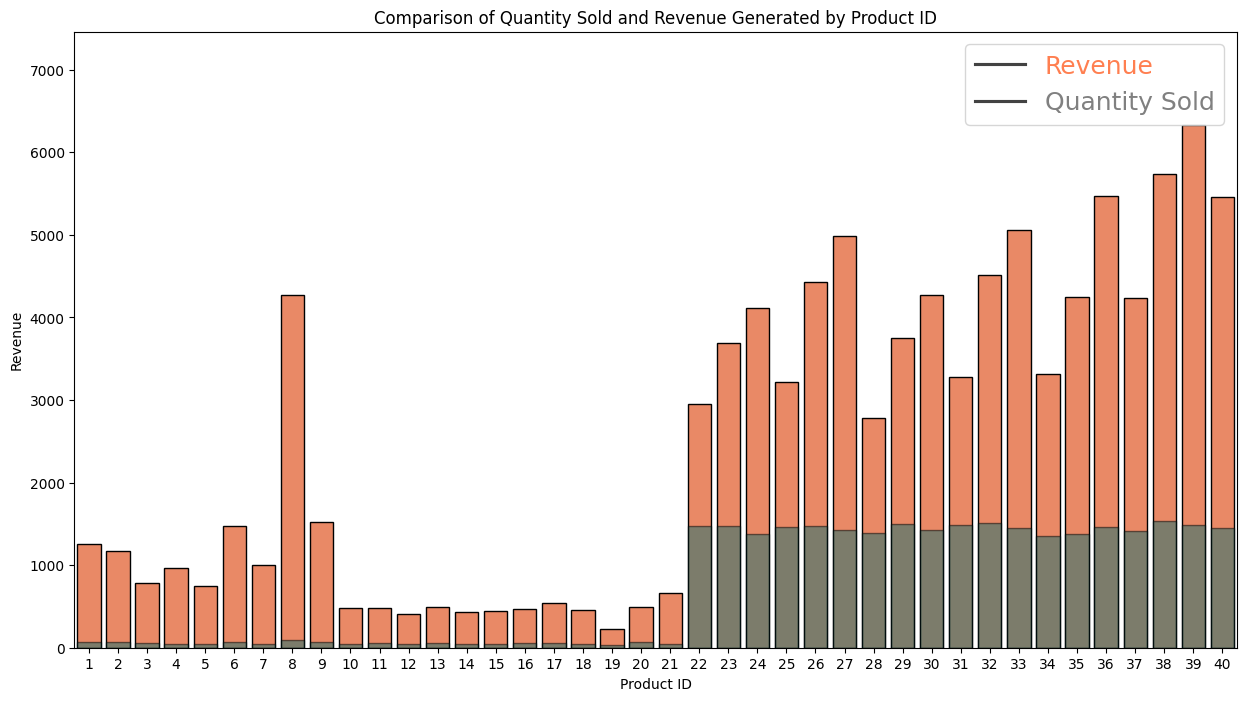

In [142]:
colors = sns.color_palette(palette='flare')

plt.figure(figsize=(15, 8))
sns.barplot(data=product_revenue, x='product_id', y='line_item_amount', color='coral', alpha=1, edgecolor='black')
sns.barplot(data=df_all_products, x='product_id', y='quantity', color='teal', alpha=0.5, edgecolor='black')
#sns.barplot(data=df_all_products, x='product_id', y='quantity', color='#040404', alpha=0.5, edgecolor='black')

plt.xlim(-0.5, 39.5)
plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.title('Comparison of Quantity Sold and Revenue Generated by Product ID')

ax = plt.gca()

legend_labels = ['Revenue', 'Quantity Sold']
legend_colors = ['coral', 'grey']
plt.legend(labels=legend_labels, labelcolor=legend_colors, fontsize='18')

plt.show()

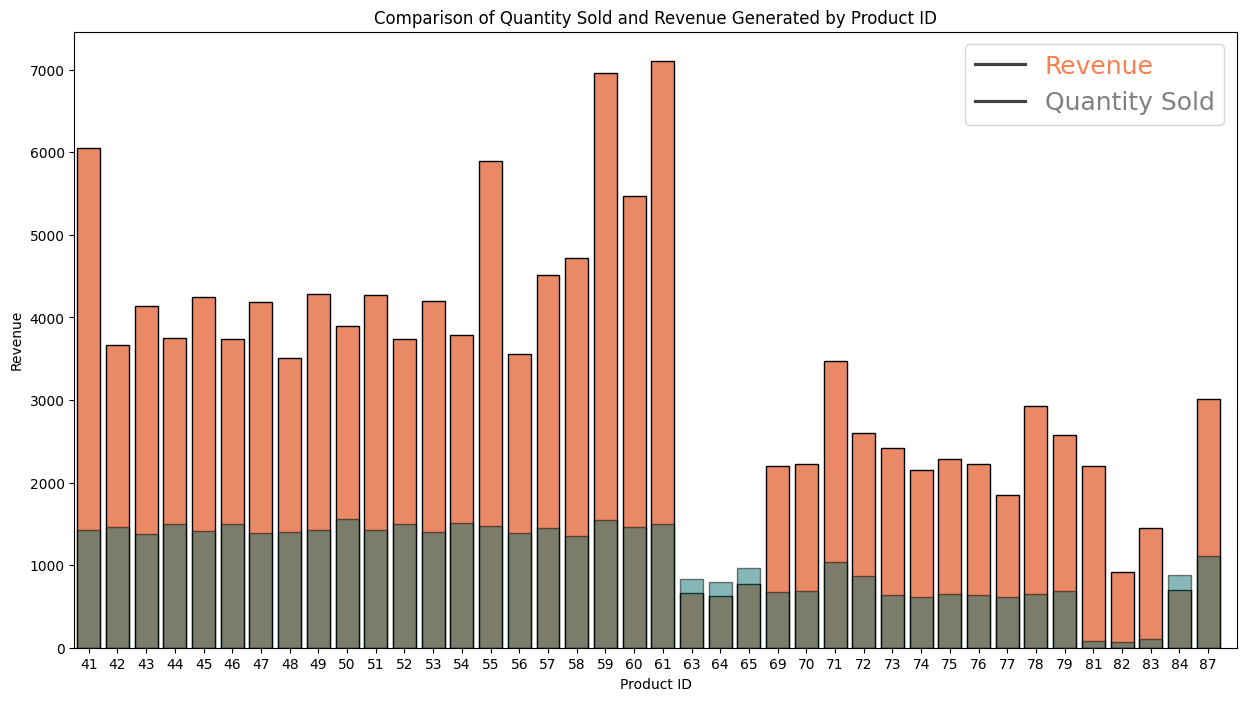

In [143]:
plt.figure(figsize=(15, 8))
sns.barplot(data=product_revenue, x='product_id', y='line_item_amount', color='coral', alpha=1, edgecolor='black')
sns.barplot(data=df_all_products, x='product_id', y='quantity', color='teal', alpha=0.5, edgecolor='black')

plt.xlim(39.5, 80)
plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.title('Comparison of Quantity Sold and Revenue Generated by Product ID')

ax = plt.gca()

legend_labels = ['Revenue', 'Quantity Sold']
legend_colors = ['coral', 'grey']
plt.legend(labels=legend_labels, labelcolor=legend_colors, fontsize='18')

In [144]:
product_revenue_ratio = df_all_products.merge(product_revenue, how='left', on='product_id')
product_revenue_ratio['revenue_ratio'] = product_revenue_ratio['line_item_amount'] / product_revenue_ratio['quantity']
product_revenue_ratio.sort_values(by=['revenue_ratio'], inplace=True)

The 3 coffee shops sell a range of 80 products in total. 
Above is a visual representation of all products sales volumes (grey) and their revenue generated (orange). This allows us to see their relative performance. 
Product ID 8 is  a particular standout example. 

<Axes: xlabel='quantity', ylabel='revenue_ratio'>

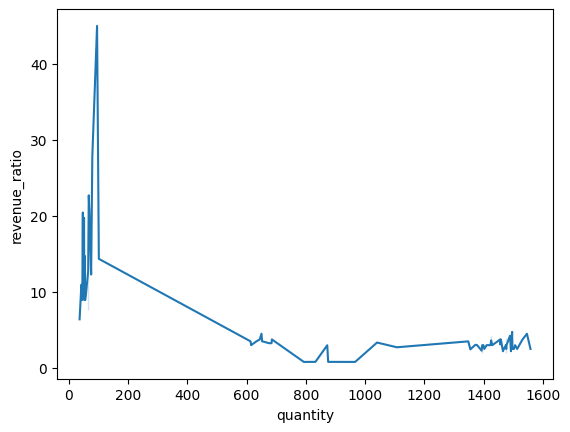

In [145]:
sns.lineplot(product_revenue_ratio, x='quantity', y='revenue_ratio')